# Module 1  

**PHY657 Statistics & Data Analysis**  
Breck Meagher (bnmeaghe@syr.edu)  
January 30, 2026

### **Activity 1: Simple Regression Problem, Frequentist Approach**

**Polynomial Curve Fitting - 1st Method (essentially linear least square fitting).**  

You will generate a set of N data generated from the function $y=\sin(2\pi x)$, smeared with random noise according to a Gaussian distribution with $\sigma = 0.3$.  

You can start by generating 10 points and then progress to 100, 1000 to see the difference between different data sets. These represent our training sample $\hat{t}$. Our goal is to predict the values of this target variable for some new value of $\hat{x}$. This is eequivalent to identify type of the underlying function (in this case $\sin(2\pi x)$) and some shape parameter (in this case $2\pi x$).  

---

#### **Activity 1A**  
**Introductory activity:** Plot these data sets (y vs. x, x is generated as a uniform distribution between 0 and 1).

In [22]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

Initialize data generation:

In [4]:
sigma = 0.3
N = [10,100,1000]

In [12]:
def noisy_sine(x, N, sigma):
    y = np.sin(2 * np.pi * x) + np.random.normal(0, sigma, size=N)
    return y

Generate x and y data to plot using our model.

In [14]:
xx = [np.linspace(0, 1, n) for n in (10, 100, 1000)]
yy = [noisy_sine(xx[i],N[i],sigma) for i in range(3)]

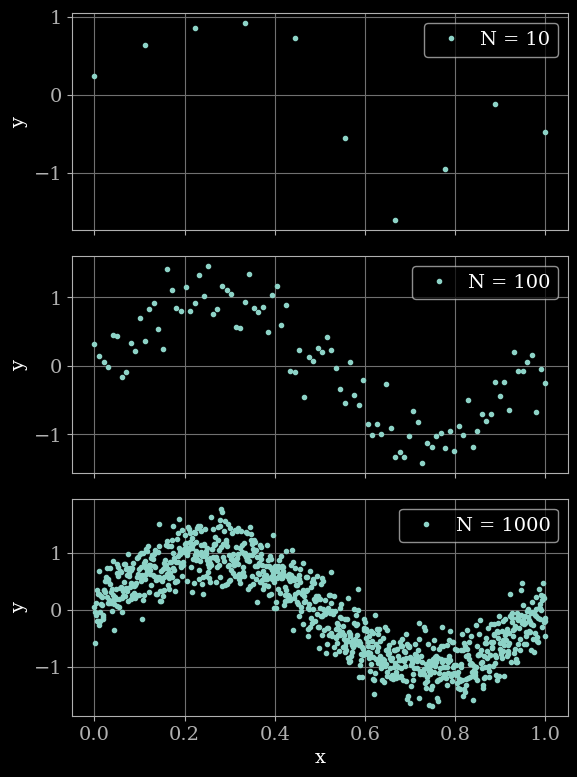

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(xx[i], yy[i], '.', label=f'N = {N[i]}')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid()

axes[-1].set_xlabel('x')
plt.tight_layout()
plt.show()

#### **Activity 1B**  
Try to do a polynomial fit to the target data set with polynomials 1-9 and compare your results with figure 1.4 of the text.

In [23]:
def poly(x, *coeffs):
    # coeffs = (a0, a1, ..., a_n)
    return sum(c * x**i for i, c in enumerate(coeffs))

def fit_polynomials(x, y, max_degree=9):
    fits = {}
    for deg in range(1, max_degree + 1):
        p0 = np.zeros(deg + 1)  # initial guess
        popt, _ = curve_fit(poly, x, y, p0=p0)
        fits[deg] = popt
    return fits

/tmp/ipykernel_43711/3124220350.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(poly, x, y, p0=p0)


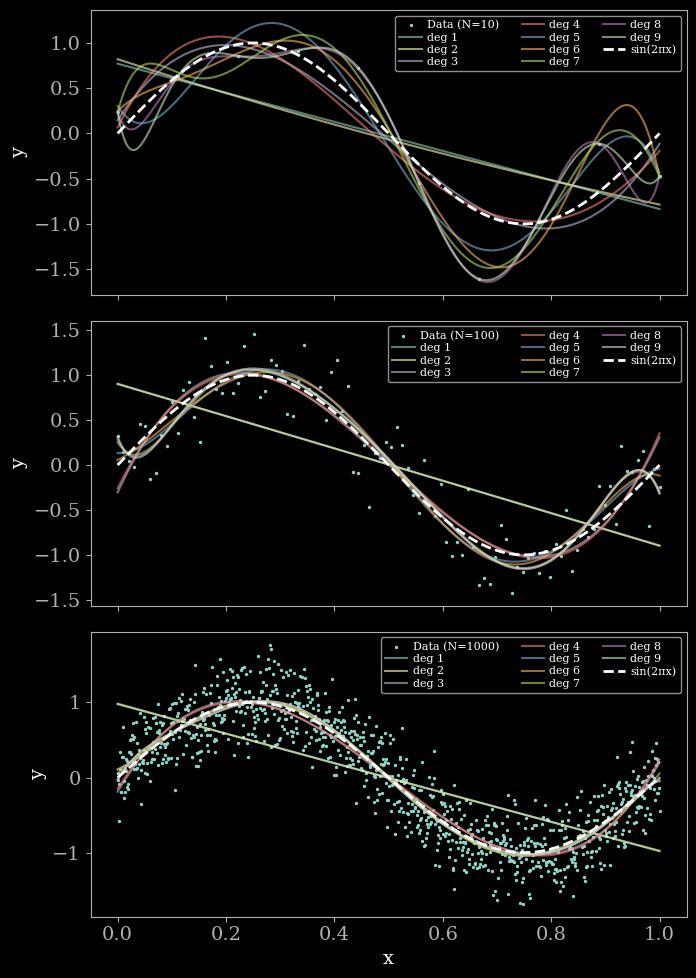

In [33]:
plt.close('all')
fig, axes = plt.subplots(3, 1, figsize=(7, 10), sharex=True)

x_fine = np.linspace(0, 1, 500)

for i, ax in enumerate(axes):
    x = xx[i]
    y = yy[i]

    fits = fit_polynomials(x, y)

    # plot data
    ax.scatter(x, y, s=2, label=f'Data (N={N[i]})')

    # plot fits
    for deg, coeffs in fits.items():
        ax.plot(x_fine, poly(x_fine, *coeffs), alpha=0.6, label=f'deg {deg}')

    # plot sin(2pix)
    ax.plot(x_fine, np.sin(2*np.pi*x_fine), 'w--', lw=2, label='sin(2πx)')

    ax.set_ylabel('y')
    ax.legend(ncol=3, fontsize=8)

axes[-1].set_xlabel('x')
plt.tight_layout()
plt.show()


#### **Analysis 1A**  
**Discuss the outcome as you increase the polynomial order and the relationship between the outcome and the number of data points used.**

Answer something here

---

#### **Analysis 1B**  
**For polynomial order n=9 and number of data points N=100, compare the noise $\sigma$ of your model with the quantity $\text{E}_{RMS}$ (Eq. 1.3).**

Answer something here

---

#### **Analysis 1C**  
**For N=100, divide your sample in training (25%) and test (75%) sets. Plot the root-mean-square errors on the training and test sets for various values of M.**

Answer something here

---

### **Activity 2: Linear Regression with Regularization**

**Now introduce a regularization term in your calculation according to Eq. 1.4 and evaluate the fit parameters for $\ln(\lambda)=-18$ and $\ln(\lambda)=0$. Compare your results to fig. 1.7.**

Equation 1.4:
$$
\tilde{E}(\mathbf{w})=\frac{1}{2}\sum_{i=1}^{N} \{y(x_n,\mathbf{w})-t_n\}^2 + \frac{\lambda}{2}\|\mathbf{w}^2\|
$$

### **Activity 3**

Consider a rare disease on which we know: 
1. The probability of contracting it is 0.0001
2. A test for the disease gives:  
    * P(+|A)=0.98
    * P(+|not A)=0.03 (*false positive*)

Do you need to be worried if you get (+) as a test result? In other words, what is the posterior probability?

**Calculate the probability of a positive test P(+)**  
Use the law of total probability

$$
P(+) = P(+|A) P(A) + P(+|\text{not A}) P(\text{not A})  
$$
$$
= (0.98)(0.0001) + (0.03)(0.9999) = \boxed{0.030095}
$$

**Calculate the Posterior Probability (Bayes' Theorem)**
Posterior probability = probability of having the disease given a positive test